In [26]:
import pandas as pd
import os
import xml.etree.ElementTree as ET
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, filters, exposure
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC

In [2]:
CWD = os.path.abspath(os.getcwd())
anotations = os.path.join(CWD, 'annotation')
images = os.path.join(CWD, 'images')


classes = ['n02113624-toy_poodle', 'n02093859-Kerry_blue_terrier', 'n02108422-bull_mastiff', 'n02085620-Chihuahua']
labels = ['toy_poodle', 'Kerry_blue_terrier', 'bull_mastiff', 'Chihuahua']

In [3]:
def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin,ymin,xmax,ymax))
    return bbox

In [4]:
for cls in classes:
    org_images = os.path.join(images, cls)
    annotations = os.path.join(anotations, cls)
    
    annotations_files = [files for files in os.listdir(annotations)]
    
    for i in range(len(annotations_files)):
        bbox = get_bounding_boxes(os.path.join(annotations, annotations_files[i]))
        dog = os.path.join(org_images, annotations_files[i] + '.jpg')
        im = Image.open(dog)
        for j in range(len(bbox)):
            im2 = im.crop(bbox[j])
            im2 = im2.resize((128,128), Image.ANTIALIAS)
            new_path = dog.replace('images','Final_Images')
            im2 = im2.convert('RGB')
            head, tail = os.path.split(new_path)
            Path(head).mkdir(parents=True, exist_ok=True)
            im2.save(new_path)
        
        

C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\947201158.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im2 = im2.resize((128,128), Image.ANTIALIAS)


## Edge Histogram

In [5]:
def angle(dx, dy):
    #Calculate the angles between horizontal and vertical operators.
    return np.mod(np.arctan2(dy, dx), np.pi)

In [13]:
columns = ['bins_' + str(i) for i in range(1, 37)]
columns.append('class')

In [19]:
classes_df = pd.DataFrame()

for k, cls in enumerate(classes):
    imgs_filename = os.path.join(CWD, 'Final_images', cls)
    img_files = [files for files in os.listdir(imgs_filename)]
    image_df = pd.DataFrame()
    
    for i, img_file in enumerate(img_files):
        file_image = os.path.join(imgs_filename, img_file)
        color_img = io.imread(file_image)
        gray_img = color.rgb2gray(color_img)
        angle_sobel = filters.sobel(gray_img)
        hist, bins = exposure.histogram(angle_sobel.ravel(), nbins=36)
        image_df[f"{cls}_{i}"] = pd.Series(hist)
    
    image_df = image_df.T
    image_df['class'] = labels[k]
    
    # image_df and append it to classes_df
    classes_df = pd.concat([classes_df, image_df])

classes_df.columns = columns

C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_df[f"{cls}_{i}"] = pd.Series(hist)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_df[f"{cls}_{i}"] = pd.Series(hist)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_df[f"{cls}_{i}"] = pd.Series(hist)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_df[f"{cls}_{i}"] = pd.Series(hist)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_df[f"{cls}_{i}"] = pd.Series(hist)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_df[f"{cls}_{i}"] = pd.Series(hist)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_df[f"{cls}_{i}"] = pd.Series(hist)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_df[f"{cls}_{i}"] = pd.Series(hist)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_df[f"{cls}_{i}"] = pd.Series(hist)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_df[f"{cls}_{i}"] = pd.Series(hist)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12764\4129944981.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

train_test_split
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [21]:
def train_test(classes_df, Xtrain, xtest, Ytrain, ytest):
    X_classes = classes_df.drop(['class'], axis = 1)
    Y_label = classes_df['class']
    
    X_train, x_test, Y_train, y_test = train_test_split(X_classes, Y_label, test_size = 0.2, random_state = 42, shuffle = True)
    return X_train, x_test, Y_train, y_test

In [22]:
X_train = pd.DataFrame(); x_test = pd.DataFrame(); Y_train = pd.DataFrame(); y_test = pd.DataFrame()

#doing train test split
X_train, x_test, Y_train, y_test = train_test(classes_df, X_train, x_test, Y_train, y_test)

In [23]:
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(510, 36)
(128, 36)
(510,)
(128,)


In [24]:
# Assuming X_train and X_test are your training and test datasets, respectively

# Fit the StandardScaler on the training dataset
scaler = StandardScaler()
scaler.fit(X_train)

# Transform (standardize) the training dataset
X_train_standardized = scaler.transform(X_train)

# Transform (standardize) the test dataset using the means and variances from the training dataset
X_test_standardized = scaler.transform(x_test)

## Model Selection

cross folding with 5 splits
* https://towardsdatascience.com/cross-validation-using-knn-6babb6e619c8

Cross-validation using KNN
* https://www.statology.org/k-fold-cross-validation-in-python/ (k fold)
* https://www.w3schools.com/python/python_ml_cross_validation.asp

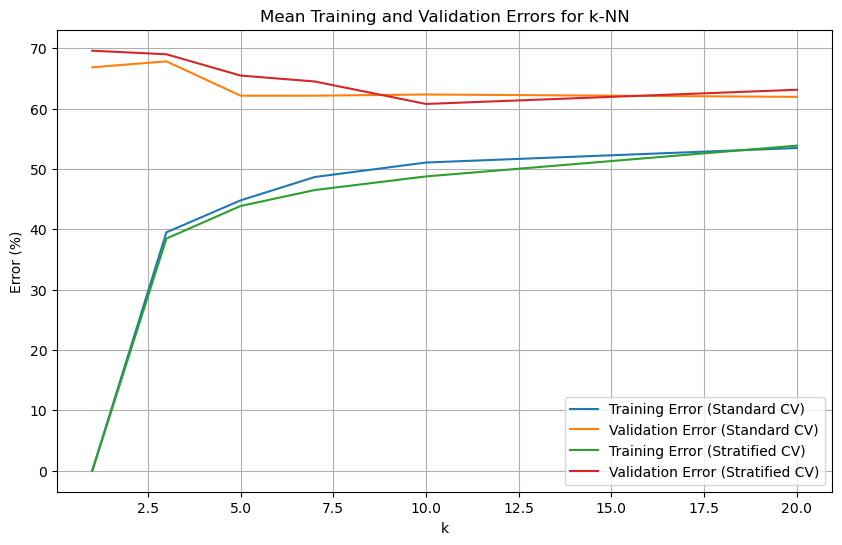

k with Lowest Mean Validation Error (Standard CV): 20
k with Lowest Mean Training Error (Standard CV): 1
k with Lowest Mean Validation Error (Stratified CV): 10
k with Lowest Mean Training Error (Stratified CV): 1
Error for the test dataset using k with lowest mean validation error from stratified CV: 63.28%


In [44]:
# Define values of k for k-NN classifiers
K_NN = [1, 3, 5, 7, 10, 20]

# Lists to store mean errors
mean_validation_error_standard = []
mean_training_error_standard = []
mean_validation_error_stratified = []
mean_training_error_stratified = []

# Perform cross-validation for each value of k
for k in K_NN:
    # Initialize lists to store errors for each fold
    val_errors_standard = []
    train_errors_standard = []
    val_errors_stratified = []
    train_errors_stratified = []
    
    # Initialize k-NN classifiers
    knn_standard = KNeighborsClassifier(n_neighbors=k)
    knn_stratified = KNeighborsClassifier(n_neighbors=k)
    
    # Perform standard 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, val_index in kf.split(X_train_standardized):
        X_train_fold, X_val_fold = X_train_standardized[train_index], X_train_standardized[val_index]
        y_train_fold, y_val_fold = Y_train[train_index], Y_train[val_index]
        
        # Fit and evaluate k-NN classifier for standard cross-validation
        knn_standard.fit(X_train_fold, y_train_fold)
        train_errors_standard.append(1 - knn_standard.score(X_train_fold, y_train_fold))
        val_errors_standard.append(1 - knn_standard.score(X_val_fold, y_val_fold))
        
    # Perform stratified 5-fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, val_index in skf.split(X_train_standardized, Y_train):
        X_train_fold, X_val_fold = X_train_standardized[train_index], X_train_standardized[val_index]
        y_train_fold, y_val_fold = Y_train[train_index], Y_train[val_index]
        
        # Fit and evaluate k-NN classifier for stratified cross-validation
        knn_stratified.fit(X_train_fold, y_train_fold)
        train_errors_stratified.append(1 - knn_stratified.score(X_train_fold, y_train_fold))
        val_errors_stratified.append(1 - knn_stratified.score(X_val_fold, y_val_fold))
    
    # Calculate mean errors for standard cross-validation
    mean_training_error_standard.append(np.mean(train_errors_standard) * 100)
    mean_validation_error_standard.append(np.mean(val_errors_standard) * 100)
    
    # Calculate mean errors for stratified cross-validation
    mean_training_error_stratified.append(np.mean(train_errors_stratified) * 100)
    mean_validation_error_stratified.append(np.mean(val_errors_stratified) * 100)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_NN, mean_training_error_standard, label='Training Error (Standard CV)')
plt.plot(K_NN, mean_validation_error_standard, label='Validation Error (Standard CV)')
plt.plot(K_NN, mean_training_error_stratified, label='Training Error (Stratified CV)')
plt.plot(K_NN, mean_validation_error_stratified, label='Validation Error (Stratified CV)')
plt.xlabel('k')
plt.ylabel('Error (%)')
plt.title('Mean Training and Validation Errors for k-NN')
plt.legend()
plt.grid(True)
plt.show()

# Identify k values with lowest mean error for each curve
min_error_k_standard_val = K_NN[np.argmin(mean_validation_error_standard)]
min_error_k_standard_train = K_NN[np.argmin(mean_training_error_standard)]
min_error_k_stratified_val = K_NN[np.argmin(mean_validation_error_stratified)]
min_error_k_stratified_train = K_NN[np.argmin(mean_training_error_stratified)]

print(f"k with Lowest Mean Validation Error (Standard CV): {min_error_k_standard_val}")
print(f"k with Lowest Mean Training Error (Standard CV): {min_error_k_standard_train}")
print(f"k with Lowest Mean Validation Error (Stratified CV): {min_error_k_stratified_val}")
print(f"k with Lowest Mean Training Error (Stratified CV): {min_error_k_stratified_train}")

# Evaluate test dataset using k with lowest mean validation error from stratified CV
best_knn = KNeighborsClassifier(n_neighbors=min_error_k_stratified_val)
best_knn.fit(X_train_standardized, Y_train)
test_error = 1 - best_knn.score(X_test_standardized, y_test)
print(f"Error for the test dataset using k with lowest mean validation error from stratified CV: {test_error * 100:.2f}%")


* As 𝑘 increases, the model complexity decreases because the decision boundary becomes smoother and less sensitive to noisy data.
* Conversely, as 𝑘 decreases, the model complexity increases because the decision boundary becomes more jagged and follows the training data closely.
* With a small 𝑘 value (e.g., 𝑘=1), the model tends to memorize the training data and can lead to overfitting, especially if the dataset contains noise or outliers.
* On the other hand, with a large 𝑘 value (e.g., 𝑘=20), the model may oversimplify the decision boundary and lead to underfitting, where the model fails to capture the underlying patterns in the data.

## Neural Network

Confusion Matrix
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#examples-using-sklearn-metrics-confusionmatrixdisplay

Neural Network 
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [34]:
neural_network = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
accuracy_nn = cross_val_score(neural_network, X_train_standardized, Y_train, cv=5, scoring='accuracy')
neural_network.fit(X_train_standardized, Y_train)
y_pred_nn = neural_network.predict(X_test_standardized)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

In [42]:
print('Neural Network (MLP):')
print('Mean Validation Accuracy:', round(accuracy_nn.mean(), 5))
print('Test Accuracy:', round(accuracy_score(y_test, y_pred_nn), 6))
print('F-measure:' , round(f1_score(y_test, y_pred_nn, average='weighted'), 5))

Neural Network (MLP):
Mean Validation Accuracy: 0.36863
Test Accuracy: 0.351562
F-measure: 0.34854


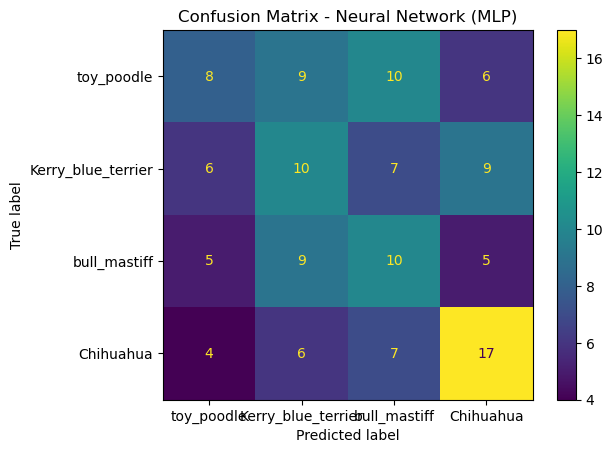

In [36]:
# Calculates and plots confusion matrix with labeled classes for Neural Network (MLP)
confusion_nn = confusion_matrix(y_test, y_pred_nn, labels=labels)
display_nn = ConfusionMatrixDisplay(confusion_matrix=confusion_nn, display_labels=labels)
display_nn.plot(cmap='viridis', xticks_rotation='horizontal') # Customize cmap and label rotation as needed
plt.title(f'Confusion Matrix - Neural Network (MLP)')
plt.show()

## AdaBoost

AdaBoost
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

In [43]:
adaboost = AdaBoostClassifier()
accuracy_adaboost = cross_val_score(adaboost, X_train_standardized, Y_train, cv=5, scoring='accuracy')
adaboost.fit(X_train_standardized, Y_train)
y_pred_adaboost = adaboost.predict(X_test_standardized)

print('AdaBoost:')
print('Mean Validation Accuracy:', round(accuracy_adaboost.mean(), 5))
print('Test Accuracy:', round(accuracy_score(y_test, y_pred_adaboost), 6))
print('F-measure:' , round(f1_score(y_test, y_pred_adaboost, average='weighted'), 5))

AdaBoost:
Mean Validation Accuracy: 0.35098
Test Accuracy: 0.351562
F-measure: 0.34595


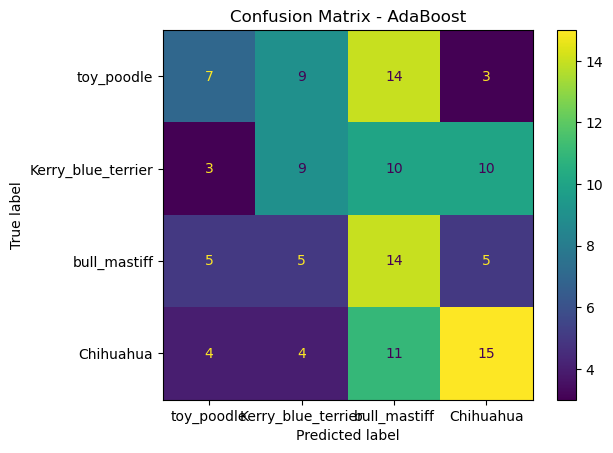

In [38]:
# Calculates and plots confusion matrix with labeled classes for AdaBoost
confusion_adaboost = confusion_matrix(y_test, y_pred_adaboost, labels=labels)
display_adaboost = ConfusionMatrixDisplay(confusion_matrix=confusion_adaboost, display_labels=labels)
display_adaboost.plot(cmap='viridis', xticks_rotation='horizontal')
plt.title(f'Confusion Matrix - AdaBoost')
plt.show()

## SVM

SVM
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [39]:
svm_classifier = LinearSVC()
accuracy_svm = cross_val_score(svm_classifier, X_train_standardized, Y_train, cv=5, scoring='accuracy')
svm_classifier.fit(X_train_standardized, Y_train)
y_pred_svm = svm_classifier.predict(X_test_standardized)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitl

In [40]:
print('SVM:')
print('Mean Validation Accuracy:', round(accuracy_svm.mean(), 5))
print('Test Accuracy:', round(accuracy_score(y_test, y_pred_svm), 5))
print('F-measure:' , round(f1_score(y_test, y_pred_svm, average='weighted'), 5))

SVM:
Mean Validation Accuracy: 0.31569
Test Accuracy: 0.29688
F-measure: 0.29368


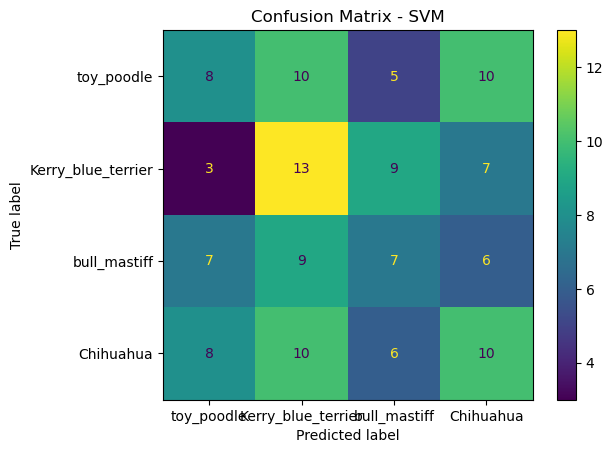

In [41]:
# Calculates and plots confusion matrix with labeled classes for SVM
confusion_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)
display_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_svm, display_labels=labels)
display_svm.plot(cmap='viridis', xticks_rotation='horizontal')
plt.title(f'Confusion Matrix - SVM')
plt.show()

* Based on the confusion matrices on the validation set for Neural Network, Adaboost and SVM
* Neural Network is best method because diagonal values are maximum that are correctly predicted values. Remaining values in matrix are wrongly classified.
* Based on the validation accuracies from the 5-fold cross-validation, Neural Network has largest value and best method.
* From the test accuracies, Neural Network has largest value and it is best method.
* From the F-measure, Neural Network has largest value and it is best method.
* Based on above statements "Neural Network" is the best method for the given data..